# Data Science I - Data Challenge 6

**Author:** Pratik Mistry

**Date:** 16 December 2020

**GitHub Link:** https://github.com/pratikmistry96/Data-Science-I-Data-Challenges/tree/master/Data_Challenge_6


In [208]:
# Code to hide python code in a report

from IPython.display import HTML

HTML('''
<script src='//code.jquery.com/jquery-3.3.1.min.js'></script>
<script>
code_show=true;
function code_toggle(){
if (code_show){
$('div.input').hide();
$('div .jp-CodeCell .jp-Cell-inputWrapper').hide();
} else{
$('div.input').show();
$('div .jp-CodeCell .jp-Cell-inputWrapper').show();
}
code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()">
<input type="submit" value="Code on/off"></form>
''')

In [209]:
# Import Packages/Functions
import pandas as pd # Functions for data frames
import numpy as np # Functions for calculations
import seaborn as sns # Functions for data frame visualization
import matplotlib.pyplot as plt # Visualization functions
from sklearn.preprocessing import StandardScaler # Import function for normalization
from sklearn.decomposition import PCA # Import PCA for dimension reduction
from sklearn.cluster import KMeans # Import clustering function

In [210]:
### Load and Filter Data
listings = pd.read_csv('data/nyc.csv.gz',compression='gzip',index_col=0) # Load the data

listings.loc[:,'price'] = listings.loc[:,'price'].str.replace('$','').str.replace(',','').astype(float) # Convert price to flaot

# Extract categorical feature names into a vector
group_feats = ['host_is_superhost','host_response_time','host_response_rate', 'host_acceptance_rate',
               'neighbourhood_group_cleansed','property_type','room_type','beds']

# Extract quantitative feature names into a vector
numeric_feats = ['bedrooms','price','review_scores_rating', 'review_scores_accuracy',
                 'availability_365','number_of_reviews_ltm','reviews_per_month']

listings_filt = listings.loc[:,group_feats+numeric_feats] # Create a filtered data frame
listings_filt = listings_filt.dropna() # Drop the NaNs

listings_filt = listings_filt[(listings_filt.loc[:,'reviews_per_month'] < 5)] # Extract only reviews per month < 5
listings_filt = listings_filt[(listings_filt.loc[:,'number_of_reviews_ltm'] < 60)] # Extract the number of reviews in last month to < 60
listings_filt = listings_filt[(listings_filt.loc[:,'price'] < 200)] # Listings must cost less than $200
listings_filt = listings_filt[(listings_filt.loc[:,'bedrooms'] < 5)] # listings should have 5 bedrooms or less

In [211]:
## Perform Dimensionality Reduction
## All use random_state=8

scaler = StandardScaler() # Initiate StandardScaler
pca = PCA(random_state=8) # Initiate PCA

listings_scale = listings_filt.loc[:,numeric_feats] # Pull quantitative data for processing

scaler.fit(listings_scale) # Fit the scaling function
listings_scale = scaler.fit_transform(listings_scale) # Scale transform and store in a new variable

pca.fit(listings_scale) #Fit the pca algorithm

cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_) # Extract the explained variance ratio and compute a cumulative sum

pc_ind = np.arange(1,len(cumulative_variance_ratio)+1) # Create a vector to add to x axis of pc numbers for variance to 

pca = PCA(n_components=4, random_state=8) # Reintiate PCA to only extract top 4 pcas
pca.fit(listings_scale) # Fit the pca
listings_pca = pca.fit_transform(listings_scale) # Fit and transform the pca

In [212]:
## Get Cluster Scree Plot
kmeans_inertia = list() # Initiate a list
# Create a for loop to get inertia values from 1 to 14 clusters
for idx in range(1,15):
    kmeans = KMeans(n_clusters=idx, random_state=8) # Compute cluster for desired cluster number
    kmeans.fit(listings_pca) # Fit the k -means
    kmeans_inertia.append(kmeans.inertia_)
num_clusters = np.arange(1,1+len(kmeans_inertia))

In [213]:
# Perform k-means clustering
kmeans = KMeans(n_clusters = 5, random_state=8) # Use 5 clusters
kmeans.fit(listings_pca) # Fit clusters on pca data
listings_cluster = kmeans.fit_predict(listings_pca) # Fit and predict clusters

listings_filt['clusters'] = listings_cluster + 1 # Add clusters to data set

## Abstract:

Choosing an AirBnb listing is often a difficult task because there are so many different factors to consider when picking a AirBnb. But often times, the two most important features for many are the number of reviews and the cost. This analysis looks at the following features (price, bedroom number, 365 availability, reviews per month, reviews in the last 12 months, scores rating, and scores accuracy) of AirBnb listings in NYC. After removing NaNs from the dataset and normalizing the dataset, the data was passed through an unsupervised learning pipeline consisitng of PCA dimensionality reduction to reduce redundancy and a kmeans clustering on the pc data. For the dimensionality reduction, this data utilized the top 4 PCs, which captured approximately 85% of the explained variance in the data. The KMeans algorithm used 4 clusters, which was determined by the scree plot of inertia vs number of components. After clustering the data and getting the predicted cluster id, the original data was visualized using boxplots, bar graphs, and a scatterplot. The analysis found a cluster that encoded data for the higher priced AirBnb listings, and another cluster that encoded data with the higher number of reviews per month. And more importantly, that these trends held when further stratifying the data by borough. This data can be used to allow renters a means of quickly visualizing data when choosing an AirBnb. However, the biggest caveat is that the data was retrieved in October 2020, so the values have been skewed by the effects of the COVID-19 pandemic.

## Introduction:

Many times it's a difficult task picking an AirBnb to rent, especially when one tries to balance the number of reviews, price, and the desired neighborhood to rent a listing. This analysis will aim to make the burden of picking an AirBnb by using publicly available AirBnb data from New York City. AirBnb provides an open database for those curious to visualize and analyze a plethora of information from listings in cities all over the world (http://insideairbnb.com/get-the-data.html). The listings.csv.gz dataset contains a culmination of NYC airbnb listings as of October 2020; however, it's important to note that the data may be skewed due to the COVID-19 pandemic because fewer people were renting listings during the lockdown period, so monthly averages may potentially be low. 

Using unsupervised learning methods, this project implements unsupervised learning methods to euclidate potential patterns in AirBnb data that can be used to identify whether or not clusters from the data can be used to develop maps that can **a)** Identify and color code listings in each borough by price range and **b)** Identify and color code listings in each borough by number of reviews. The analysis will comprise of feature selection, dimensionality reduction through Principal Component Analysis, and finally clustering on the PCA using KMeans. Pattern identification through unsupervised learning allows us to cluster data without subjectivity or bias and cluster data using a variety of parameters.

## Methods:

### Feature Selection:

For this analysis, I decided to include the following features with inclusion and exclusion criteria from the main listings.csv.gz dataset:
- Listing Price - Looking at listings than cost less than 200 dollars
- Number of Bedrooms - Looking at listings with fewer than 5 bedrooms
- 365 Availability - Needs at least 1 availability in 365 days
- Reviews Per Month - Fewer than 5 reviews per month
- Number of Reviews Last 12 Months - Less than 60 reviews in the last 12 months
- Review Scores Rating
- Review Scores Accuracy

I chose these features because they comprise a set of variables that are of most interest to individuals when looking for an AirBnb. The inclusion and exclusion criterion were chosen based on a set of personal preference when choosing an AirBnb for at most a group of five people. Ideally, the AirBnb isn't too expenseive (< 200 dollars), enough bedrooms for at most a group of 5-8 people, and fewer than 5 reviews per month or 60 reviews in the last 12 months because it indicates that the rental unit is typically used for long(er) term rentals.

All rows containing NaNs in the feature columns were removed from the dataset.


### Dimensionality Reduction:

After retaining the desirable number of features, the dataset was normalized using the StandardScaler function from the skit-learn library in python. Following normalization, the scaled data was processed using principal component analysis -- using the PCA function from Python's skit-learn library -- to reduce the dimensionality of the data and provide reduced data that can then be clustered upon using KMeans. The following plot contains the cumulative explained variance ratio by PC number. In this analysis, I decided to use 4 principal components for further analysis, which explains 85% of the variance of the data.

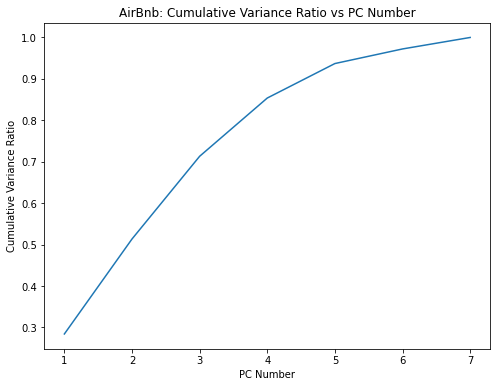

In [214]:
# Plot Cumulative Variance Ratios to Visualize Number of Components
plt.figure(figsize=(8,6)) # Set figure size
plt.plot(pc_ind,cumulative_variance_ratio) # plot pc number vs cumulative variance
plt.xlabel('PC Number') # Set x label
plt.ylabel('Cumulative Variance Ratio') # Set y label
plt.title('AirBnb: Cumulative Variance Ratio vs PC Number') # Add title
plt.show() # Show plot

**Figure 1:** This is a plot from the PCA algorithm that diplays the cumulative variance ration vs the principal component number. Using the cut-off of approximately 85% explained variance, this plot shows that we can utilize 4 principal components to explain 85% of the variance.

### Clustering:

Following dimensionality reduction, I clustered the data on the top four PC scores to extract clusters based on similar variances. In order to determine the number of clusters to use for the analysis, I created a scree plot of inertias up to 15 total clusters (**Figure 2**), and from the scree plot, I determined the best number of clusters to use is about 5 clusters. Following the clustering, I added the predicted clustered labels to the original dataset.

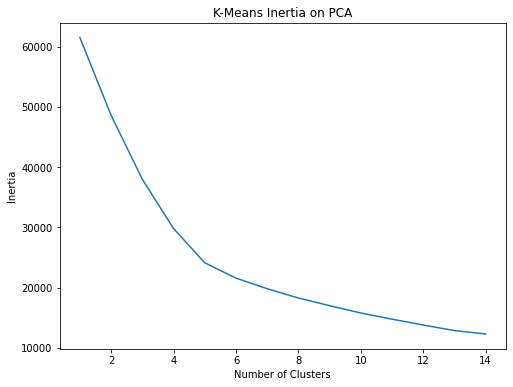

In [215]:
plt.figure(figsize=(8,6)) # Set figure size
plt.plot(num_clusters,kmeans_inertia) # plot cluster number vs inertia
plt.xlabel('Number of Clusters') # Label x axis
plt.ylabel('Inertia') # Label y axis
plt.title('K-Means Inertia on PCA') # title plot
plt.show() # show plot

**Figure 2:** This is a plot of K-Means Inertia vs Number of Clusters. In this plot, we look for an "elbow" in the plot to identify the appropriate number of clusters to use for this the analysis is approximately 4 clusters.

### Post-Clustering Visualization

After performing the KMeans clustering, I used the cluster ids to see if I can identify clear trends in the prices of AirBnbs by clusters and the number of reviews per month by clusters and visualize this data using boxplots. Furtermore, I further dissected this data to see if global trends were maintained when stratifying the data by boroughs.

## Results:


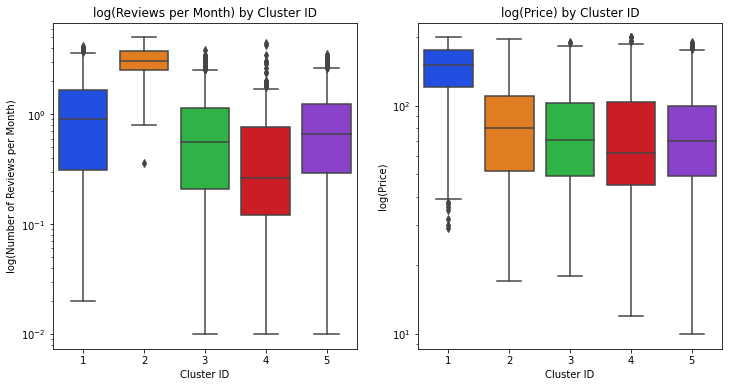

In [216]:
plt.figure(figsize=(12,6)) # Set figure size

plt.subplot(1,2,1) # Create a subplot
sns.boxplot(x='clusters',y='reviews_per_month',palette='bright',data=listings_filt) # Create a boxplot of clusters and reviews
plt.yscale('log') # Log scale y axis
plt.xlabel('Cluster ID') # Add x label
plt.ylabel('log(Number of Reviews per Month)') # Add y label
plt.title('log(Reviews per Month) by Cluster ID') # Add title

plt.subplot(1,2,2) # Use the next position in subplot
sns.boxplot(x='clusters',y='price',palette='bright',data=listings_filt) # Create a boxplot of clusters and price
plt.yscale('log') # Log scale y axis
plt.xlabel('Cluster ID') # Add x label
plt.ylabel('log(Price)') # Add y label
plt.title('log(Price) by Cluster ID') # Add title

plt.show() # Show plot

**Figure 3:** This plot compares the cluster ids predicted from the k-means algorithm with the reviews per month on the left and the listing price on the right. As we can see, cluster 2 better codes for listings with more reviews per month, followed by clusters 1,5,3,and 4. On the right, we can see that cluster 1 codes for higher priced listings, but the others are relatively the same. These distributions will be further dissected by borough.

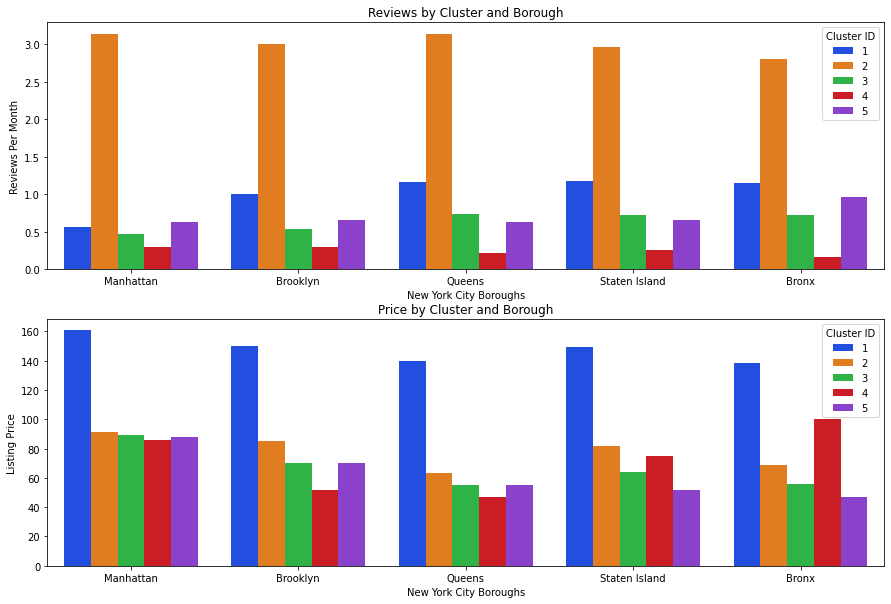

In [219]:
plt.figure(figsize=(15,10)) # set figure size

plt.subplot(2,1,1) # Create 2,1 subplot
sns.barplot(x='neighbourhood_group_cleansed',y='reviews_per_month',hue='clusters',
            palette='bright', estimator = np.median,ci=None,data=listings_filt) # Add bar plot to first subplot
plt.xlabel('New York City Boroughs') # Label the x axis
plt.ylabel('Reviews Per Month') # Label y axis
plt.title('Reviews by Cluster and Borough')
plt.legend(title='Cluster ID') # Title legend

plt.subplot(2,1,2)
sns.barplot(x='neighbourhood_group_cleansed',y='price',hue='clusters', palette='bright',
            estimator = np.median, ci=None, data=listings_filt) # Add bar plot to second subplot
plt.xlabel('New York City Boroughs')
plt.ylabel('Listing Price')
plt.legend(title='Cluster ID')
plt.title('Price by Cluster and Borough')
plt.show()

**Figure 4:** Plot comparing the reviews per month by borough colored by cluster id. The peak of the bar indicates the median value of the Reviews Per Month (top) and Listing Price (Bottom). 

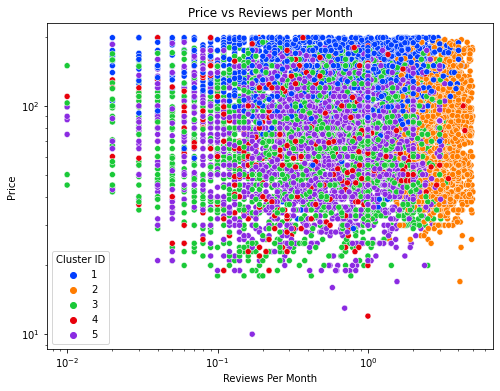

In [218]:
# Create a scatter plot of reviews by price
plt.figure(figsize=(8,6)) # Set figure size
sns.scatterplot(x='reviews_per_month',y='price',hue='clusters', palette='bright',data=listings_filt) # Create scatter plot
plt.xlabel('Reviews Per Month') # Add x lable
plt.ylabel('Price') # Add y label
plt.title('Price vs Reviews per Month') # Add title
# Log sclae x and y axis
plt.xscale('log')
plt.yscale('log')
plt.legend(title="Cluster ID") # Title legend
plt.show()

**Figure 5:** From this scatterplot, we can visualize the cluster analysis of the PC scores onto a scatterplot comparing price and reviews from month, and we see that we can clearly identify clusters 3 and 4, which are indicative of higher reviews and higher prices.

## Discussion:

From the boxplot plots in **Figure 3 (left)**, we see that Cluster 2 codes for the AirBnb listings with the higher number of reviews per month with reviews descending in the following order clusters 1,5,3,and 4. Then examining **Figure 3 (right)**, we see that Cluster 1 codes for higher priced listings with equal distribution across the remaining clusters. However, the boxplots only examine the trends by clusters, and it's more informative to examine if these trends from the clusters are maintained when looking at the distribution of price and reviews per month across the five boroughs. When observing **Figure 4**, we see that the cluster trends identified in **Figure 3** are maintained across each borough showing that the trend is not an anomaly of a single borough over powering the information by a cluster.

Finally, we looked at the scatterplot of reviews per month by price to see if there is some structure or relationship between these two variables. We can see that clusters 2 and 1 code for the extremes in the data for number of reviews and price. However, there's little structure in the middle of the scatterplot.

Conceptually, this information can be used to color code listings in a map to allow an indiviudal to visually inspect AirBnb listings within each borough. Through this future visualization, the color code from the visualization can inform us if that review has a high number of reviews per month, which may be of interest for an individual. Or if you want to avoid paying too much for an AirBnb, one of the color codes will inform you if the prices are in the higher range.

However, this analysis should be repeated with historical data ignoring listings from 2020 due to the effects of COVID-19 on the AirBnb listings. Fewer people are renting AirBnbs, which affects both reviews per month, and the listings have decreased in price, so they are not reflective of the normal rate. Additionally, I want the bathrooms data to be included in the data because it adds an additional feature that's of interest for many people when renting AirBnbs, especially in large groups. That being said, the similarity in the remaining clusters may be due to COVID effects.

## Conclusion:

This project aimed at extracting clusters from AirBnb data that can be used in a visual manner to better comb through AirBnb listings. After implementing unsupervised learning methods, PCA dimensionality reduction and KMeans clustering, we were able to identify two clusters that captured listings with higher prices and higher number of reviews per month. However, additional analysis needs to be done to remove the effects of COVID-19 on the AirBnb prices and reviews per month. There may have been a loss of resolution due to the lack of visitors and the need to decrease prices to attract more people.